# Comparing model predictions

The purpose of this notebook is to see how the models are differing in their predictions.

In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [22]:
df = pd.read_csv('../data/Final Data/pct-diff-mlb-games-with-preds.csv')

In [23]:
df.head()

,home_team,away_team,Y,M,avg_pct_diff,obp_pct_diff,slg_pct_diff,team_ERA_pct_diff,team_WHIP_pct_diff,team_W-L_pct_diff,...,ops_pct_diff,RD_pct_diff,FP_pct_diff,Rank_pct_diff,WPA_pct_diff,log_5,home_win,xgb_pred,knn_pred,nn_pred
0,KCA,NYN,2016,4,8.620726,3.092675,2.578581,7.754011,8.007859,5.263158,...,2.805262,15.662651,-0.101523,0.000000,96.381239,0.5,1,1,1,1
1,PIT,SLN,2016,4,2.309712,0.376945,-0.040732,8.978328,-1.211283,-2.040816,...,0.147930,-20.792079,-0.305810,50.000000,96.381239,0.5,1,1,1,1
2,TBA,TOR,2016,4,-5.864577,-7.555239,-12.023378,-1.871658,1.468752,-16.250000,...,-10.063876,-10950.000000,-0.101626,75.000000,96.381239,0.5,0,0,1,1
3,ANA,CHN,2016,4,0.398896,-4.950458,-0.794957,14.720812,8.900281,-14.117647,...,-2.616367,678.571429,0.203252,0.000000,96.381239,0.5,0,0,1,1
4,ARI,COL,2016,4,-1.095675,2.427164,-5.196744,-24.444444,-13.778463,13.924051,...,-1.831024,1628.571429,0.101420,-66.666667,96.381239,0.5,0,1,1,1


## Column distribution by model

In [5]:
xgb_correct = df[df['xgb_pred'] == df['home_win']]
xgb_wrong = df[df['xgb_pred'] != df['home_win']]

knn_correct = df[df['knn_pred'] == df['home_win']]
knn_wrong = df[df['knn_pred'] != df['home_win']]

nn_correct = df[df['nn_pred'] == df['home_win']]
nn_wrong = df[df['nn_pred'] != df['home_win']]

In [12]:
cols = list(df.columns)
cols = [c for c in cols if c.endswith('_diff')] + ['log_5']

In [13]:
def plot_density_by_model(model_correct, model_wrong):
    for c in cols:
        plt.figure(figsize=(12, 8))
        plt.hist(model_correct[c], label='Correct', alpha=0.5, density=True)
        plt.hist(model_wrong[c], label='Wrong', alpha=0.5, density=True)
        plt.legend()
        plt.title(c)
        plt.show();

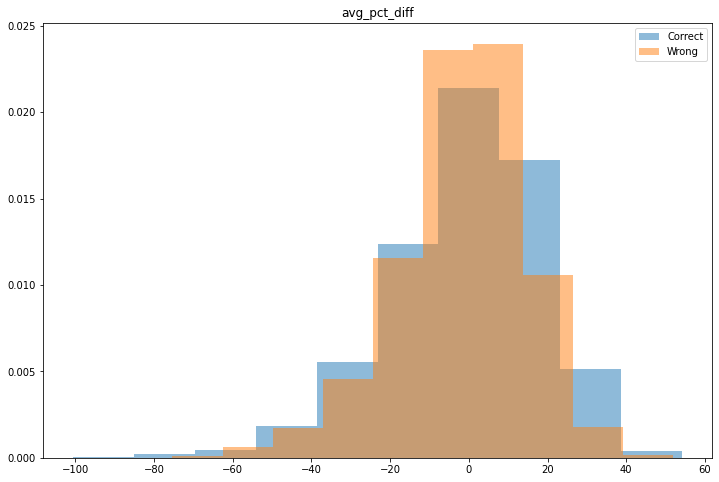

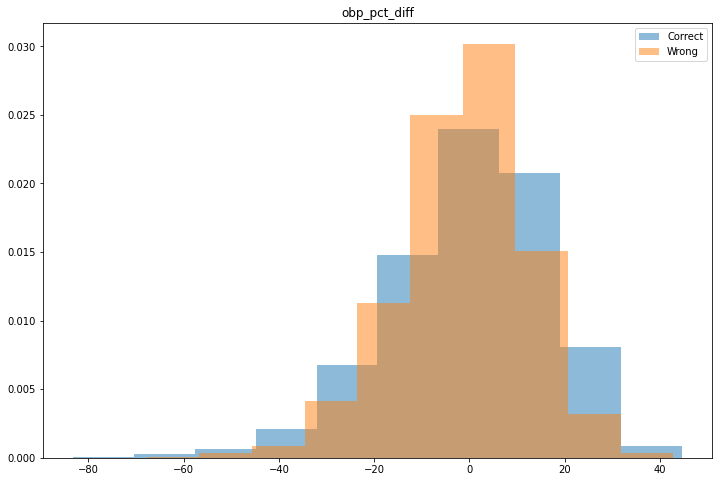

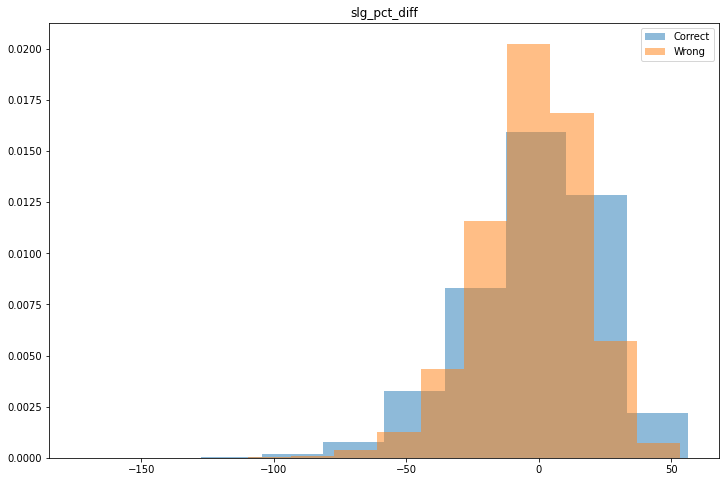

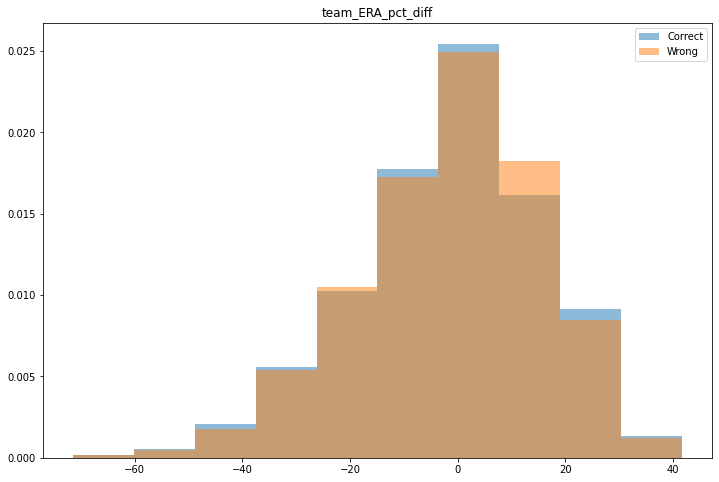

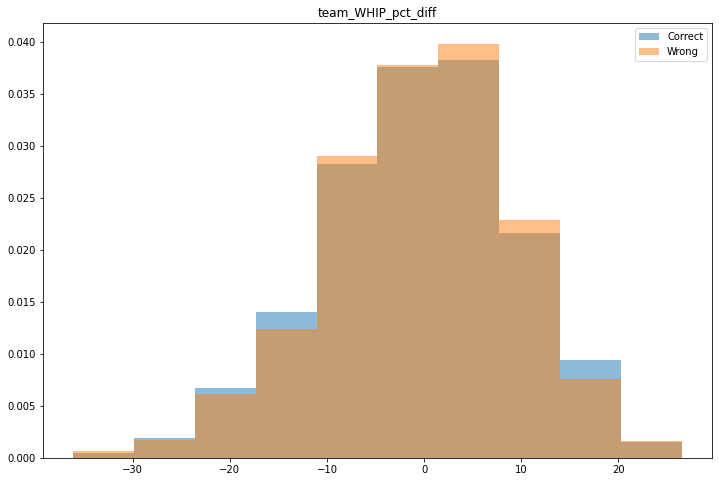

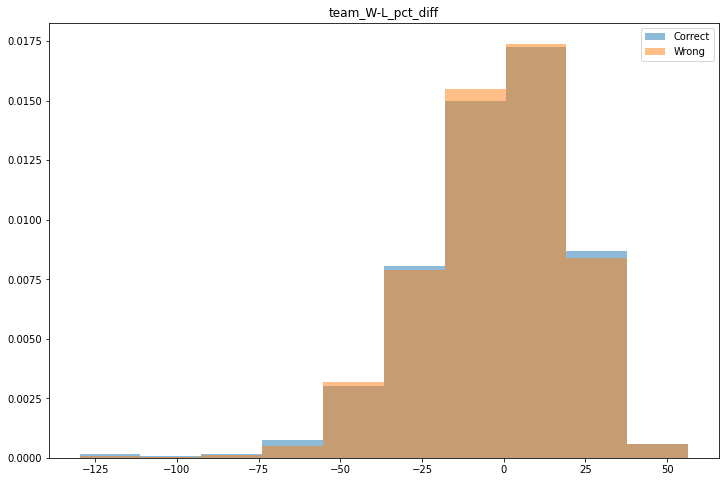

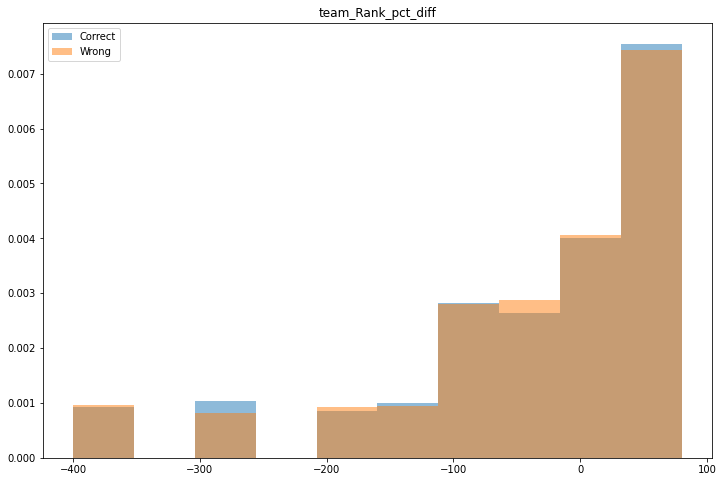

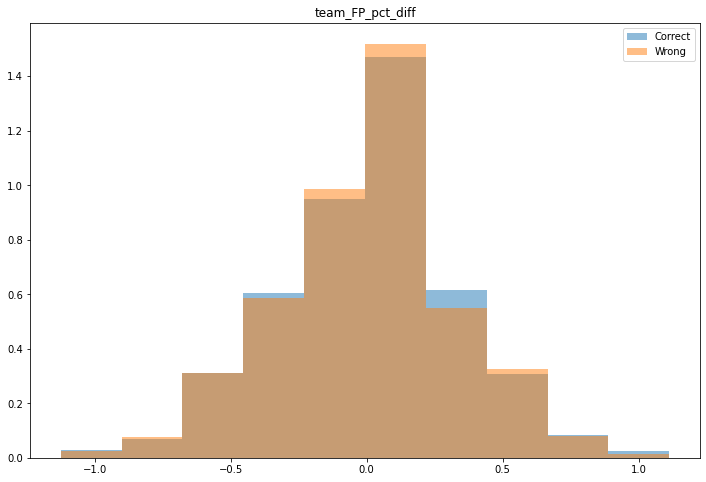

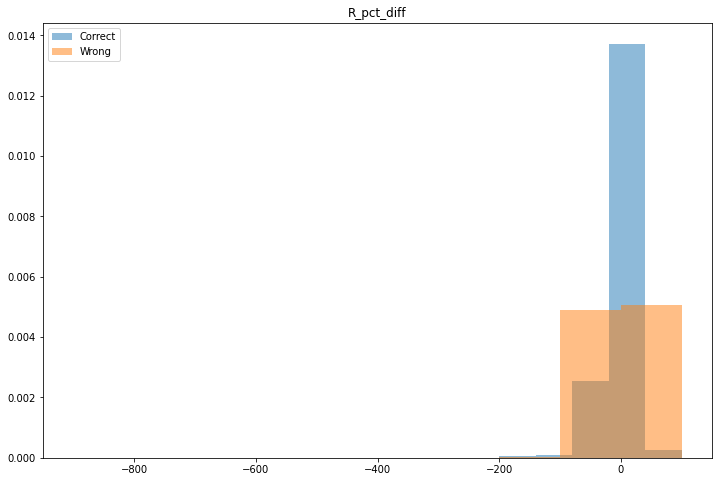

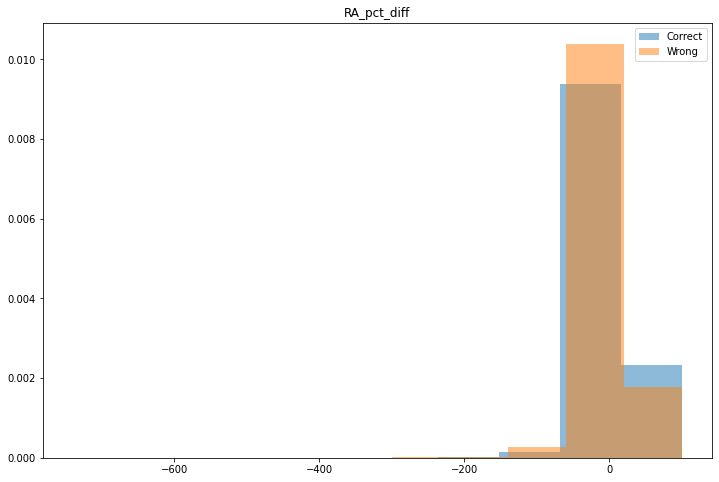

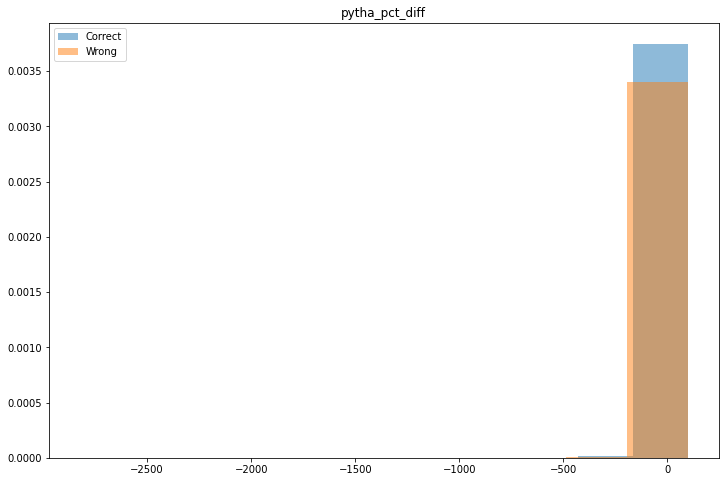

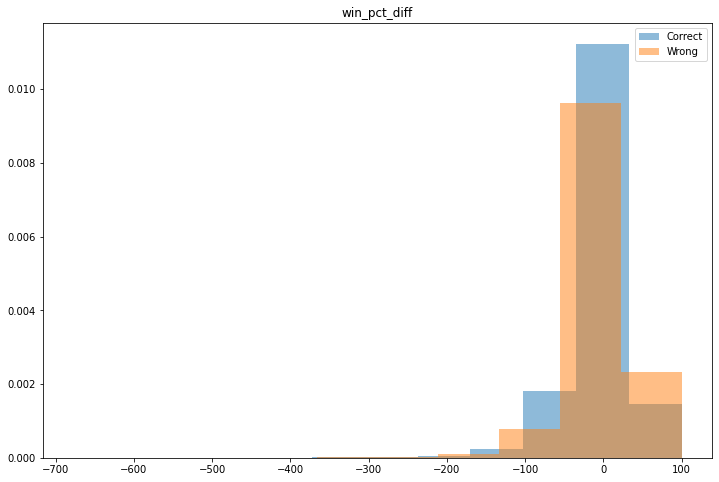

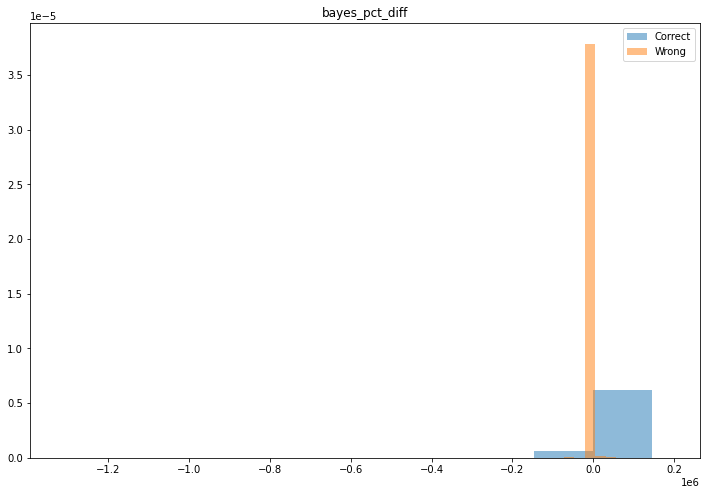

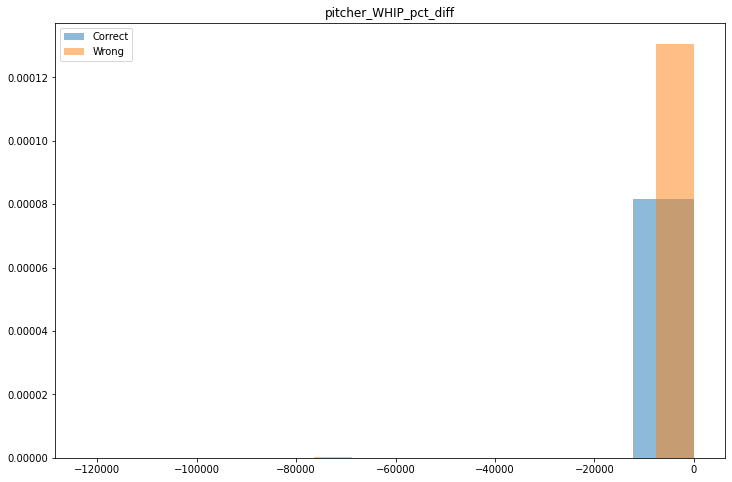

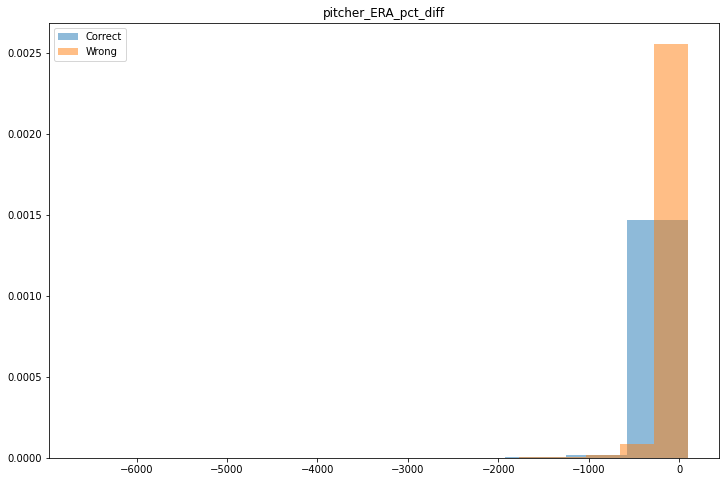

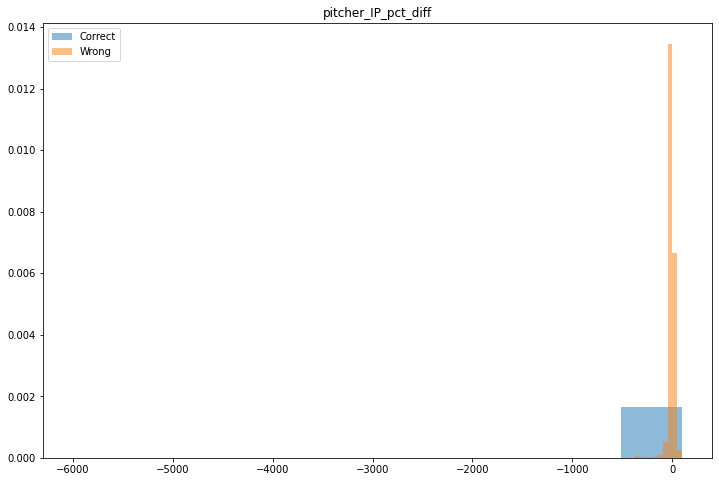

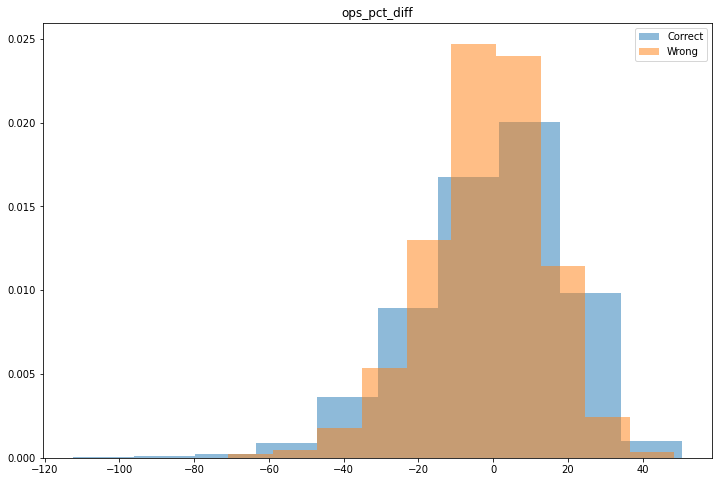

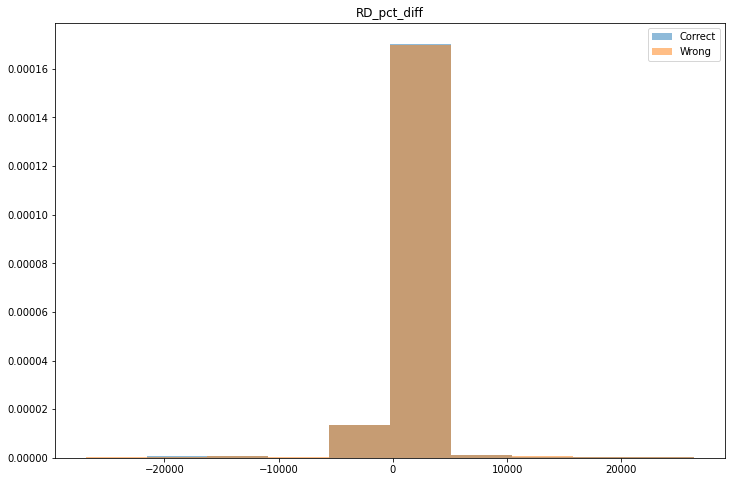

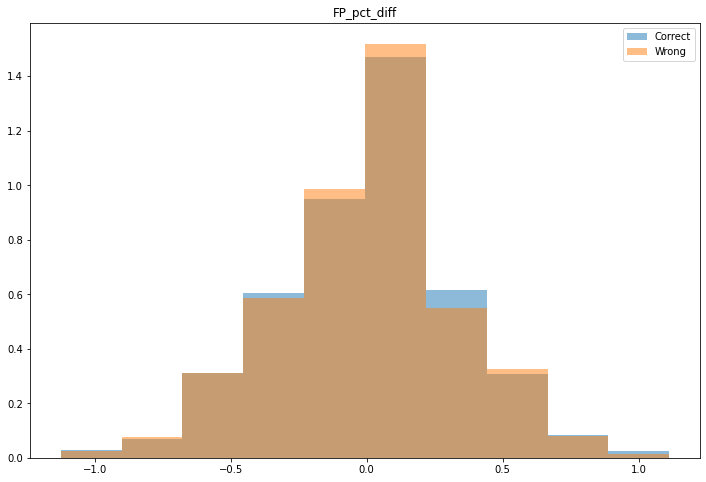

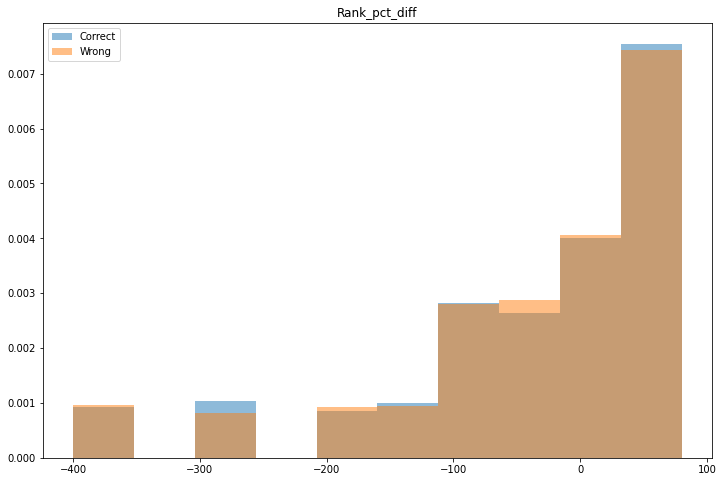

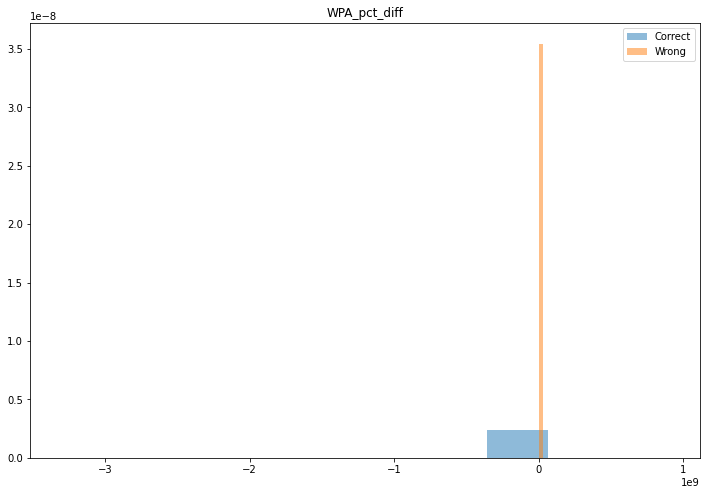

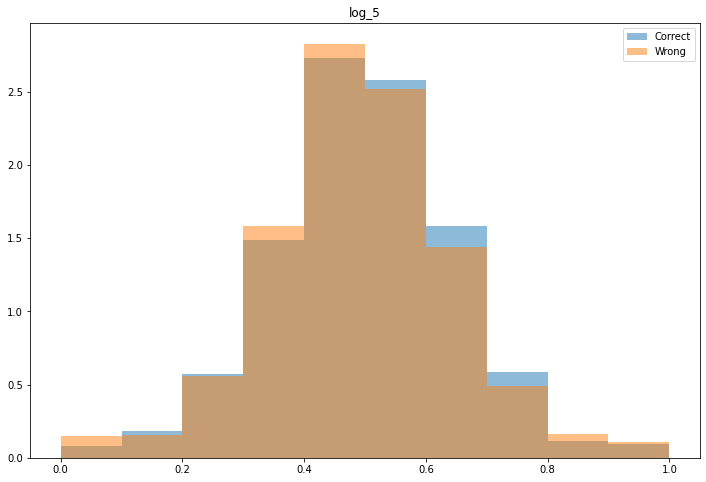

In [14]:
plot_density_by_model(xgb_correct, xgb_wrong)

In [17]:
def plot_density_across_models(col):
    models_correct = [xgb_correct, knn_correct, nn_correct]
    models_wrong = [xgb_wrong, knn_wrong, nn_wrong]
    models_labels = ['XGB', 'KNN', 'NN']
        
    plt.figure(figsize=(12, 8))
    for i, m_c in enumerate(models_correct):
        plt.hist(m_c[col], label=models_labels[i], alpha=0.5, density=True)
    plt.legend()
    plt.title(f'{col} correct')
    plt.show()
    
    plt.figure(figsize=(12, 8))
    for i, m_c in enumerate(models_wrong):
        plt.hist(m_c[col], label=models_labels[i], alpha=0.5, density=True)
    plt.legend()
    plt.title(f'{col} wrong')
    plt.show();

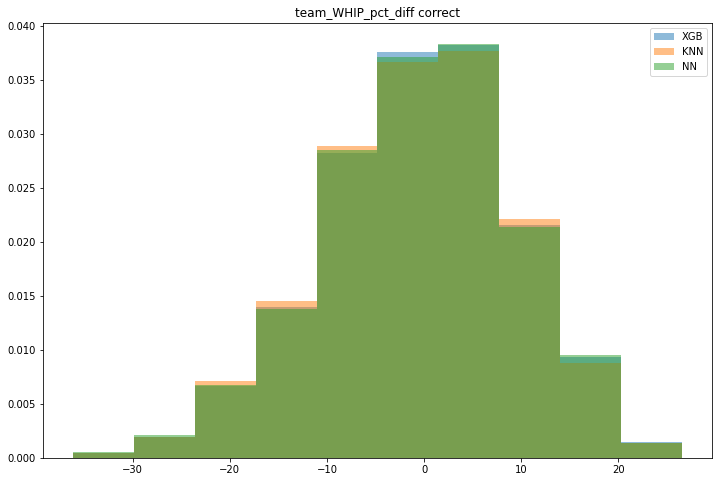

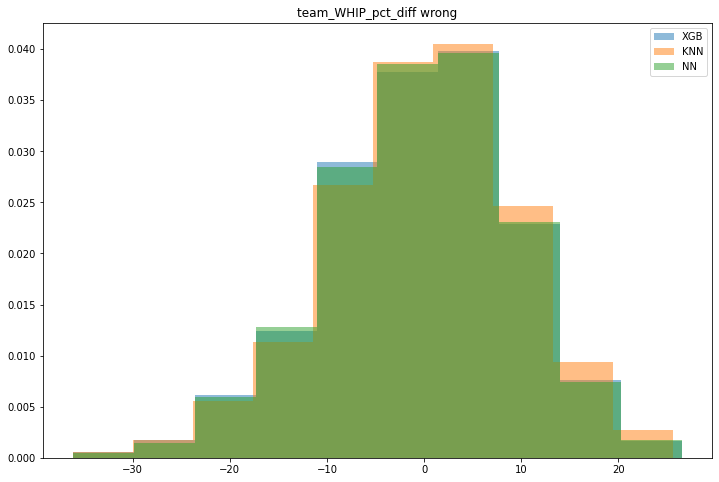

In [20]:
plot_density_across_models('team_WHIP_pct_diff')

## Accuracy by team

In [26]:
df['xgb_correct'] = (df['home_win'] == df['xgb_pred']).astype(bool)
df['knn_correct'] = (df['home_win'] == df['knn_pred']).astype(bool)
df['nn_correct'] = (df['home_win'] == df['nn_pred']).astype(bool)

In [27]:
df.head()

,home_team,away_team,Y,M,avg_pct_diff,obp_pct_diff,slg_pct_diff,team_ERA_pct_diff,team_WHIP_pct_diff,team_W-L_pct_diff,...,Rank_pct_diff,WPA_pct_diff,log_5,home_win,xgb_pred,knn_pred,nn_pred,xgb_correct,knn_correct,nn_correct
0,KCA,NYN,2016,4,8.620726,3.092675,2.578581,7.754011,8.007859,5.263158,...,0.000000,96.381239,0.5,1,1,1,1,True,True,True
1,PIT,SLN,2016,4,2.309712,0.376945,-0.040732,8.978328,-1.211283,-2.040816,...,50.000000,96.381239,0.5,1,1,1,1,True,True,True
2,TBA,TOR,2016,4,-5.864577,-7.555239,-12.023378,-1.871658,1.468752,-16.250000,...,75.000000,96.381239,0.5,0,0,1,1,True,False,False
3,ANA,CHN,2016,4,0.398896,-4.950458,-0.794957,14.720812,8.900281,-14.117647,...,0.000000,96.381239,0.5,0,0,1,1,True,False,False
4,ARI,COL,2016,4,-1.095675,2.427164,-5.196744,-24.444444,-13.778463,13.924051,...,-66.666667,96.381239,0.5,0,1,1,1,False,False,False


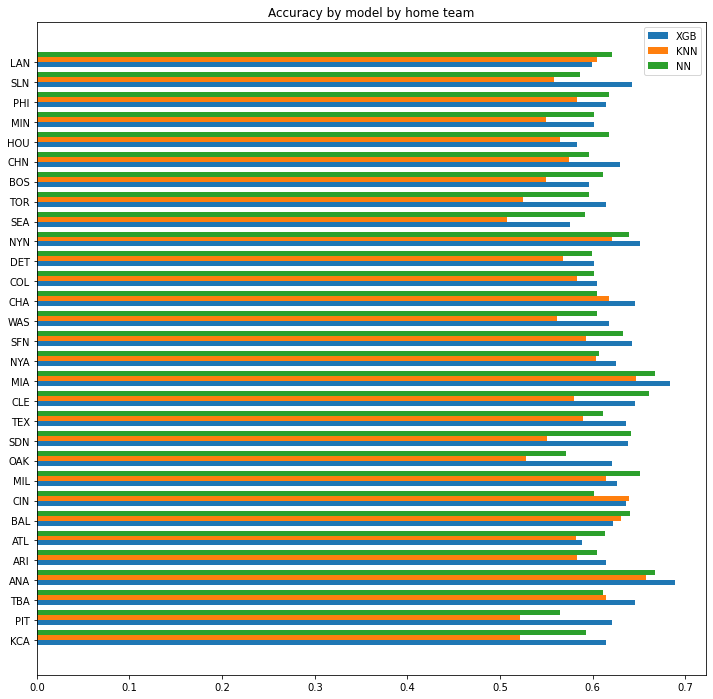

In [44]:
N = df['home_team'].nunique()
ind = np.arange(N)
width = 0.25

plt.figure(figsize=(12, 12))
plt.barh(ind, df.groupby('home_team')['xgb_correct'].mean().values, width, label='XGB')
plt.barh(ind + width, df.groupby('home_team')['knn_correct'].mean().values, width, label='KNN')
plt.barh(ind + 2*width, df.groupby('home_team')['nn_correct'].mean().values, width, label='NN')

plt.yticks(ind + width / 2, df['home_team'].unique())
plt.legend()
plt.title('Accuracy by model by home team');

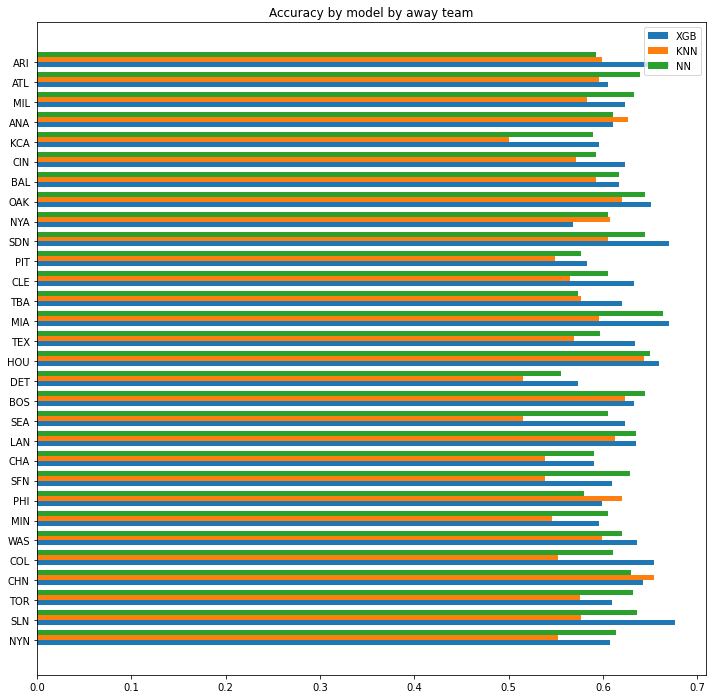

In [46]:
N = df['away_team'].nunique()
ind = np.arange(N)
width = 0.25

plt.figure(figsize=(12, 12))
plt.barh(ind, df.groupby('away_team')['xgb_correct'].mean().values, width, label='XGB')
plt.barh(ind + width, df.groupby('away_team')['knn_correct'].mean().values, width, label='KNN')
plt.barh(ind + 2*width, df.groupby('away_team')['nn_correct'].mean().values, width, label='NN')

plt.yticks(ind + width / 2, df['away_team'].unique())
plt.legend()
plt.title('Accuracy by model by away team');